In [2]:
#imprting required header files
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
#loading the fashion datasets in the form of train data and trainig 
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
#printing one example of training and testing data in the form of array 
print(train_x)
print(test_x)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ...

In [6]:
#to check the shape of the training and test data 
print(train_x.shape)
print(test_y.shape)

(60000, 28, 28)
(10000,)


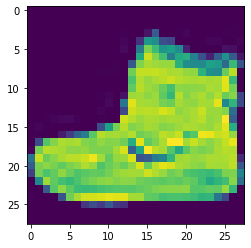

In [8]:
#to show the data 
plt.imshow(train_x[0])

In [6]:
#to convert vector(interger) to binary class
y_train_one_hot =tf.keras.utils.to_categorical(train_y)
y_test_one_hot= tf.keras.utils.to_categorical(test_y)

In [10]:
#to reshape the data in the form of 28X28 in 1 channel 
train_x = train_x.reshape(60000,28,28,1)
test_x = test_x.reshape(10000,28,28,1)

In [8]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
#CNN network with two cnn layers and two layers 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=32, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy',metrics= ['accuracy'] )
hist = model.fit(train_x,y_train_one_hot, validation_data= (test_x, y_test_one_hot), epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 1.0743 - accuracy: 0.7931 - val_loss: 0.3712 - val_accuracy: 0.8694
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2920 - accuracy: 0.8903 - val_loss: 0.3209 - val_accuracy: 0.8854
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2248 - accuracy: 0.9153 - val_loss: 0.3325 - val_accuracy: 0.8828
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1852 - accuracy: 0.9314 - val_loss: 0.3398 - val_accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1453 - accuracy: 0.9459 - val_loss: 0.3617 - val_accuracy: 0.8832
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1123 - accuracy: 0.9583 - val_loss: 0.3817 - val_accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0900 - accuracy: 0.9680 - val_loss: 0.4523 - val_ac

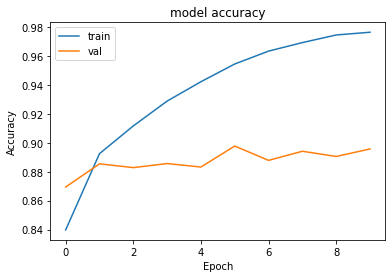

In [12]:
#To plot the graph for the history of accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc= 'upper left')
plt.show()